# Rent-Predict (aplicación de predicción del precio del alquiler en España)

![img](img/Cabecera.png "Cabecera")

#### **Autor**  
---
* *Apellidos:* González Fornell  
* *Nombre:* José Manuel
* *Correo:* josemanuelgonzalezfornell@gmail.com
---




  


## Índice  
---
1. [Introducción](#1)
2. [Objetivo](#2)
3. [Importación de librerías](#3)
4. [Datos](#4)
    1. [Observación inicial de datos](#41)
    2. [EDA](#42)
    3. [Preparación de datos](#43)
    4. [Limpieza y preparación de otros dataframes](#44)
    5. [Exportación de datos](#45)
5. [Baselines](#5)

## 1. Introducción<a id='1'></a>  
  
Tras, haber realizado anteriormente un análisis exploratorio de datos (**EDA** de sus siglas en inglés), se procede a dar un paso más allá y se quiere intentar predecir el precio de nuevos municipios que no se hayan podido tener en cuenta en los datos anteriores. Esto simplificaría notablemente la tarea de  recolección de datos y, unificado a un modelo de series temporales, podría ayudar a la predicción del precio de nuevos municipios en un futuro.  

## 2. Objetivo<a id='2'></a>  
  
El objetivo de este trabajo es **obtener** un **modelo** de machine learning que **prediga** los **precios del alquiler** en los diversos municipios de España.

## 3. Importación de librerías<a id='3'></a>  
  
Se importan las librerías necesarias para cumplir el objetivo propuesto.

In [1]:
# Se importan las librerías necesarias
import pandas as pd
import re
import utils.functions as fn
from sklearn.preprocessing import OrdinalEncoder
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import re
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score

## 4. Datos<a id='4'></a>  
  
Para cumplir el objetivo de esta tarea, se utilizaran los datos recolectados y limpiados en el anterior **EDA** que hacían referencia al alquiler en 2021. Esto es así debido a que este año es el último año donde se tienen todos los datos recolectados. Por ello, se importa el dataset *df_alquiler_2020_21_processed.csv*.

In [2]:
# Se importa el dataset con los datos
df_init = pd.read_csv("data/raw/df_alquiler_2020_21_processed.csv", sep=";", index_col=0)

### 4.1. Observación inicial de datos <a id='41'></a> 
  
Se realiza una visualización rápida de los datos.

In [3]:
# Se imprimen las primeras 5 filas
df_init.head()

,Codigo_provincia,Provincia,Codigo_municipio,Total_vc_2020,Total_vu_2020,Alquiler_mes_vc_m2_2020,Alquiler_mes_vu_m2_2020,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,...,Porcentaje_viviendas_turisticas_2020,Total_casas_alquiler_2020,Porcentaje_viviendas_alquiler_2020,Porcentaje_vc_alquiler_2020,Porcentaje_vu_alquiler_2020,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
Abadín,27,Lugo,27001,204.615385,11.0,2.793878,1.346634,0.0,9.0,2.821674,...,0.300842,215.615385,12.973248,12.311395,0.661853,0.601685,9.0,0.541516,0.000000,0.541516
Abanilla,30,Murcia,30001,15.000000,22.0,3.036911,1.546392,20.0,27.0,3.016350,...,0.401517,37.000000,0.825340,0.334597,0.490743,0.758421,47.0,1.048405,0.446130,0.602275
Abarán,30,Murcia,30002,188.000000,54.0,2.961165,2.727273,193.0,52.0,3.000000,...,0.015117,242.000000,3.658352,2.842026,0.816327,0.120937,245.0,3.703704,2.917611,0.786092
Abegondo,15,"Coruña, A",15001,7.000000,60.0,3.585766,3.200000,7.0,56.0,3.660036,...,0.255836,67.000000,2.142629,0.223857,1.918772,0.543652,63.0,2.014711,0.223857,1.790854
Abrera,8,Barcelona,8001,374.000000,153.0,6.782946,6.734083,383.0,140.0,7.142857,...,0.243263,527.000000,9.861527,6.998503,2.863024,0.449102,523.0,9.786677,7.166916,2.619760


In [4]:
# Se imprime la información básica del dataframe
df_init.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, Abadín to Úbeda
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Codigo_provincia                      2033 non-null   int64  
 1   Provincia                             2033 non-null   object 
 2   Codigo_municipio                      2033 non-null   int64  
 3   Total_vc_2020                         2033 non-null   float64
 4   Total_vu_2020                         2033 non-null   float64
 5   Alquiler_mes_vc_m2_2020               2033 non-null   float64
 6   Alquiler_mes_vu_m2_2020               2033 non-null   float64
 7   Total_vc_2021                         2033 non-null   float64
 8   Total_vu_2021                         2033 non-null   float64
 9   Alquiler_mes_vc_m2_2021               2033 non-null   float64
 10  Alquiler_mes_vu_m2_2021               2033 non-null   float64
 11  Comunidad_autono

In [5]:
# Se obtiene un análisis estadístico rápido del dataframe
df_init.describe()

,Codigo_provincia,Codigo_municipio,Total_vc_2020,Total_vu_2020,Alquiler_mes_vc_m2_2020,Alquiler_mes_vu_m2_2020,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,...,Porcentaje_viviendas_turisticas_2020,Total_casas_alquiler_2020,Porcentaje_viviendas_alquiler_2020,Porcentaje_vc_alquiler_2020,Porcentaje_vu_alquiler_2020,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
count,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,...,2033.000000,2033.00000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,24.630103,24728.374816,863.826968,108.001542,4.590670,3.685202,888.735253,111.439752,4.761812,3.835967,...,1.135120,971.82851,6.504461,4.817282,1.687179,2.210585,1000.175005,6.060227,4.324845,1.735382
std,14.398262,14396.898838,6716.929723,186.783305,1.688096,1.503601,6953.047247,192.373629,1.754545,1.551642,...,2.438868,6826.52737,6.521453,6.117396,1.640207,4.785380,7065.619083,4.644640,4.101835,1.655592
min,2.000000,2003.000000,1.000000,0.000000,1.648352,0.881049,0.000000,0.000000,1.691968,1.164412,...,0.000000,2.00000,0.049318,0.008220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,11030.000000,30.000000,20.000000,3.313753,2.590191,24.000000,21.000000,3.428956,2.703437,...,0.082610,62.00000,2.321429,1.052950,0.568720,0.168103,58.000000,2.236422,0.950540,0.611933
50%,24.000000,24223.000000,121.000000,51.000000,4.166667,3.333333,108.000000,52.000000,4.324324,3.454601,...,0.265957,184.00000,4.985472,3.182257,1.073208,0.533511,175.000000,4.904925,3.116939,1.117735
75%,38.000000,38030.000000,421.000000,124.000000,5.483860,4.455446,412.000000,126.000000,5.714286,4.602713,...,0.915192,553.00000,9.226826,6.932277,2.268405,1.789264,550.000000,9.196740,6.633785,2.317042
max,52.000000,52001.000000,256903.000000,2981.000000,12.121212,14.024390,266196.000000,3062.000000,12.437483,14.045214,...,23.771915,259884.00000,81.770074,77.921453,13.374309,52.586357,269258.000000,31.004103,27.716049,13.730793


Se eliminan todas las columnas que aportan datos del año 2020, ya que son datos que no usaremos para entrenar al modelo.

In [6]:
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# Se eliminan las variables con 2020 al final
df_2021 = df_init.drop(col_to_drop, axis=1)
df_2021.head()

,Codigo_provincia,Provincia,Codigo_municipio,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,Comunidad_autonoma,Poblacion_2021,Inmuebles_totales,Viviendas_turisticas_2021,Turistas_2021,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
Abadín,27,Lugo,27001,0.0,9.0,2.821674,2.205769,Galicia,2297.0,1662.0,10,2147,0.601685,9.0,0.541516,0.000000,0.541516
Abanilla,30,Murcia,30001,20.0,27.0,3.016350,2.500000,"Murcia, Región de",6116.0,4483.0,34,23013,0.758421,47.0,1.048405,0.446130,0.602275
Abarán,30,Murcia,30002,193.0,52.0,3.000000,2.876485,"Murcia, Región de",13066.0,6615.0,8,3356,0.120937,245.0,3.703704,2.917611,0.786092
Abegondo,15,"Coruña, A",15001,7.0,56.0,3.660036,3.473607,Galicia,5494.0,3127.0,17,4365,0.543652,63.0,2.014711,0.223857,1.790854
Abrera,8,Barcelona,8001,383.0,140.0,7.142857,7.054119,Cataluña,12620.0,5344.0,24,43430,0.449102,523.0,9.786677,7.166916,2.619760


Guardamos este dataframe en una variable porque este dataset será el utilizado en la aplicación web como dataset de datos actuales.

In [7]:
# Guardamos este dataset en una variable
df_current_year = df_2021.copy()

Una vez guardado el dataframe en el estado anterior, se continua limpiando el dataframe.  
  
Se elimina la variable *provincia* debido a que esa información queda reflejada en la variable *Codigo_provincia*. También se elimina la variable *Codigo_municipio* porque la información que aparece es redundante con la información perteneciente al índice.

In [8]:
# Se eliminan las variables Provincia y Codigo_municipio
df_2021.drop(["Provincia", "Codigo_municipio", "Codigo_provincia"],axis=1, inplace=True)
df_2021.head()

,Total_vc_2021,Total_vu_2021,Alquiler_mes_vc_m2_2021,Alquiler_mes_vu_m2_2021,Comunidad_autonoma,Poblacion_2021,Inmuebles_totales,Viviendas_turisticas_2021,Turistas_2021,Porcentaje_viviendas_turisticas_2021,Total_casas_alquiler_2021,Porcentaje_viviendas_alquiler_2021,Porcentaje_vc_alquiler_2021,Porcentaje_vu_alquiler_2021
Abadín,0.0,9.0,2.821674,2.205769,Galicia,2297.0,1662.0,10,2147,0.601685,9.0,0.541516,0.000000,0.541516
Abanilla,20.0,27.0,3.016350,2.500000,"Murcia, Región de",6116.0,4483.0,34,23013,0.758421,47.0,1.048405,0.446130,0.602275
Abarán,193.0,52.0,3.000000,2.876485,"Murcia, Región de",13066.0,6615.0,8,3356,0.120937,245.0,3.703704,2.917611,0.786092
Abegondo,7.0,56.0,3.660036,3.473607,Galicia,5494.0,3127.0,17,4365,0.543652,63.0,2.014711,0.223857,1.790854
Abrera,383.0,140.0,7.142857,7.054119,Cataluña,12620.0,5344.0,24,43430,0.449102,523.0,9.786677,7.166916,2.619760


Se eliminan los "_2021" de las columnas que lo tengan.

In [9]:
# Se eliminan los _2021 de las columnas que lo tengan usando un regex
df_2021.columns = [re.sub(r"_20\d{2}$", '', col) for col in df_2021.columns]

Se comprueba que las columnas que quedan están limpias y son las deseadas.

In [10]:
# Se imprime las columnas obtenidas del dataframe
df_2021.columns

Index(['Total_vc', 'Total_vu', 'Alquiler_mes_vc_m2', 'Alquiler_mes_vu_m2',
       'Comunidad_autonoma', 'Poblacion', 'Inmuebles_totales',
       'Viviendas_turisticas', 'Turistas', 'Porcentaje_viviendas_turisticas',
       'Total_casas_alquiler', 'Porcentaje_viviendas_alquiler',
       'Porcentaje_vc_alquiler', 'Porcentaje_vu_alquiler'],
      dtype='object')

### 4.2. EDA<a id='42'></a>

Se procede a realizar un EDA rápido, haciendo el análisis univariante y el análisis vibariante. Para ello, se usan funciones propias.

Análisis univariante de Total_vc:


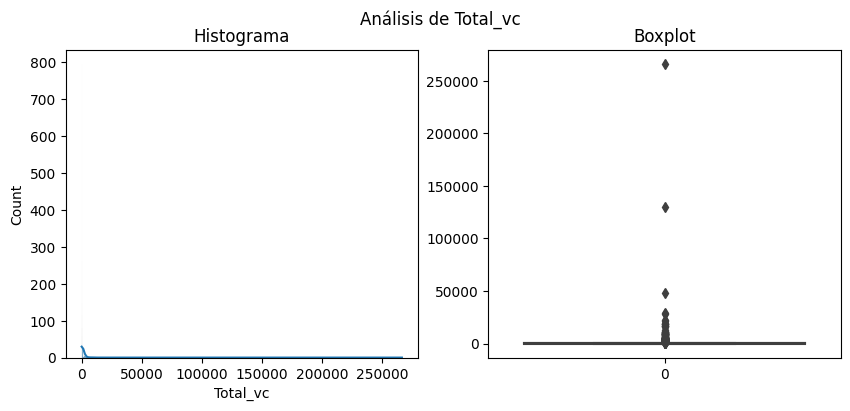

La columna Total_vc no presenta una distribución normal



Análisis univariante de Total_vu:


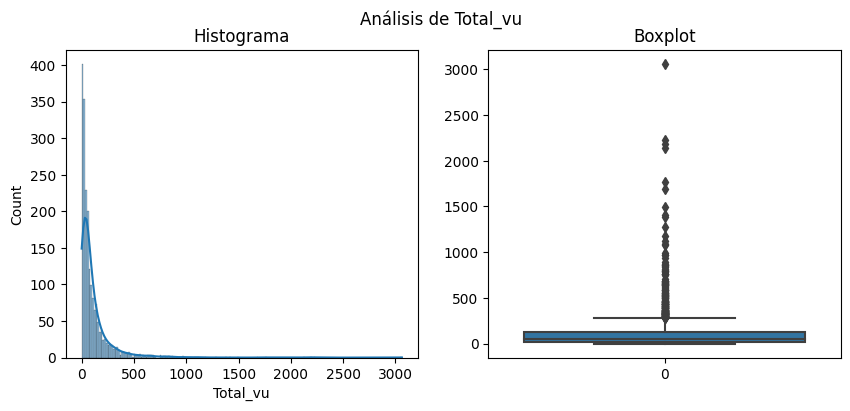

La columna Total_vu no presenta una distribución normal



Análisis univariante de Alquiler_mes_vc_m2:


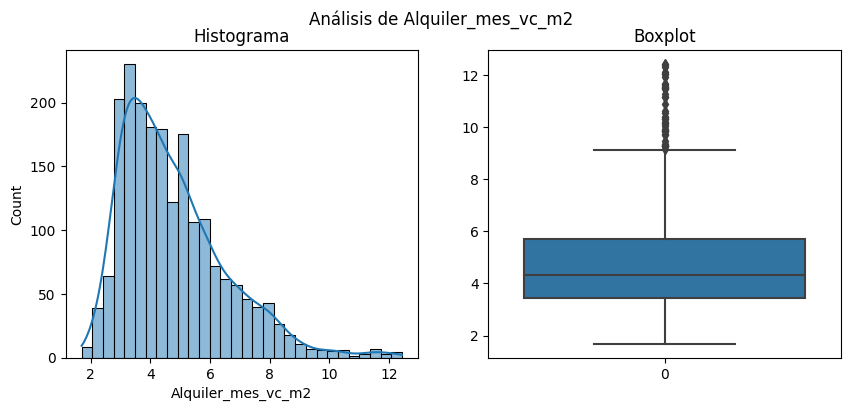

La columna Alquiler_mes_vc_m2 no presenta una distribución normal



Análisis univariante de Alquiler_mes_vu_m2:


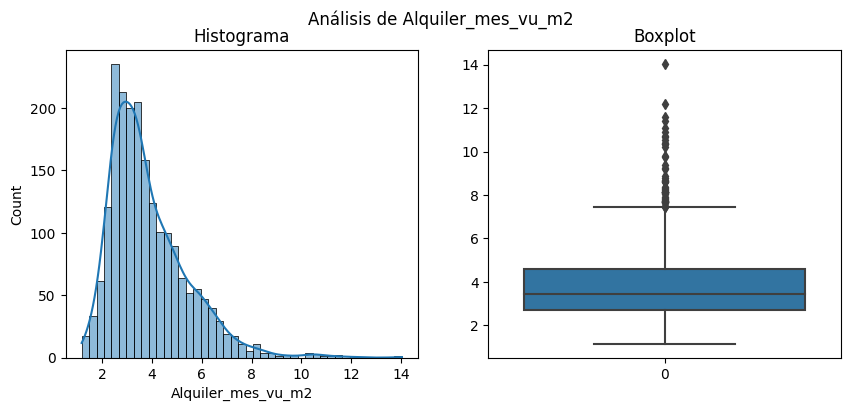

La columna Alquiler_mes_vu_m2 no presenta una distribución normal



Análisis univariante de Comunidad_autonoma:
Variable categórica:
-Valores únicos:
Comunidad_autonoma
Andalucía                  417
Cataluña                   342
Comunitat Valenciana       216
Galicia                    208
Castilla-La Mancha         185
Castilla y León            127
Madrid, Comunidad de       109
Extremadura                 88
Canarias                    80
Aragón                      60
Balears, Illes              52
Cantabria                   47
Asturias, Principado de     42
Murcia, Región de           38
Rioja, La                   20
Ceuta                        1
Melilla                      1
Name: count, dtype: int64
-Número de valores únicos: 17




Análisis univariante de Poblacion:


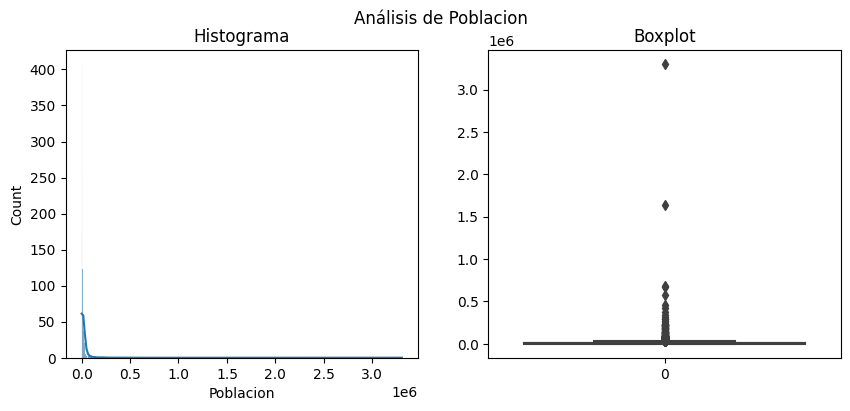

La columna Poblacion no presenta una distribución normal



Análisis univariante de Inmuebles_totales:


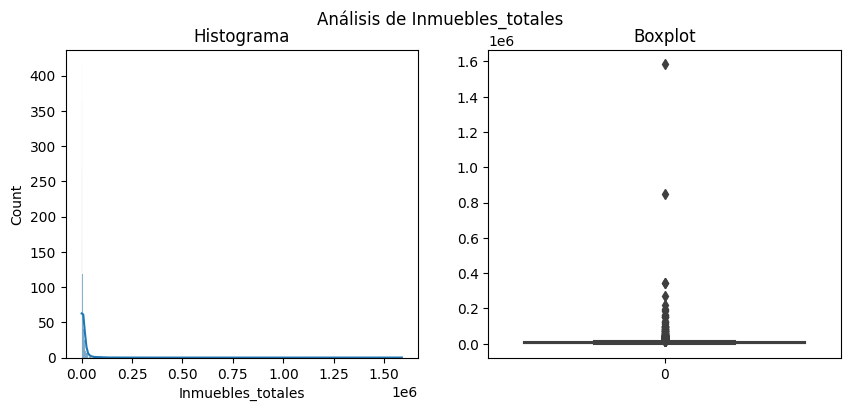

La columna Inmuebles_totales no presenta una distribución normal



Análisis univariante de Viviendas_turisticas:


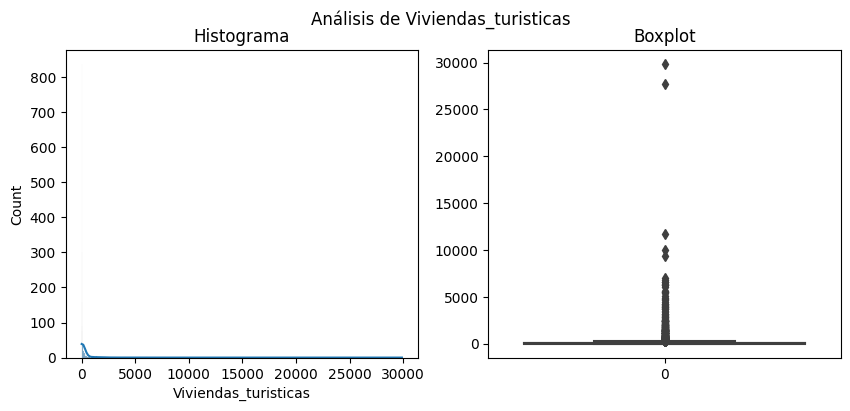

La columna Viviendas_turisticas no presenta una distribución normal



Análisis univariante de Turistas:


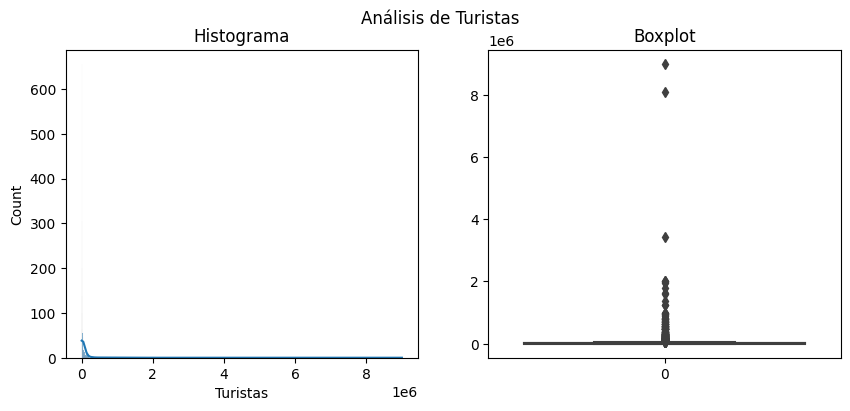

La columna Turistas no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_turisticas:


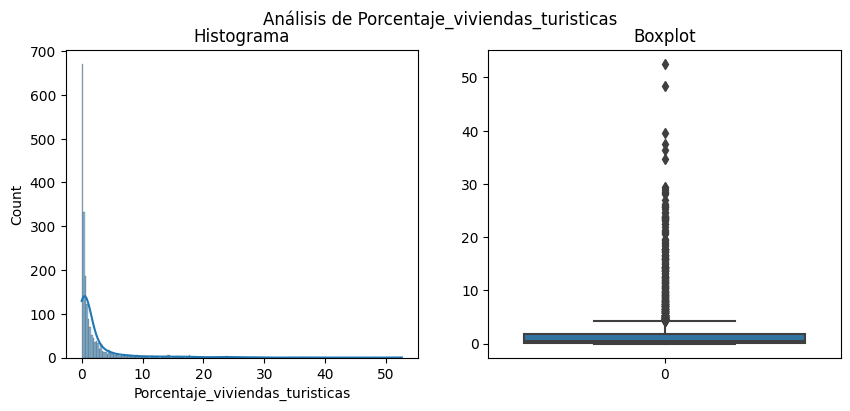

La columna Porcentaje_viviendas_turisticas no presenta una distribución normal



Análisis univariante de Total_casas_alquiler:


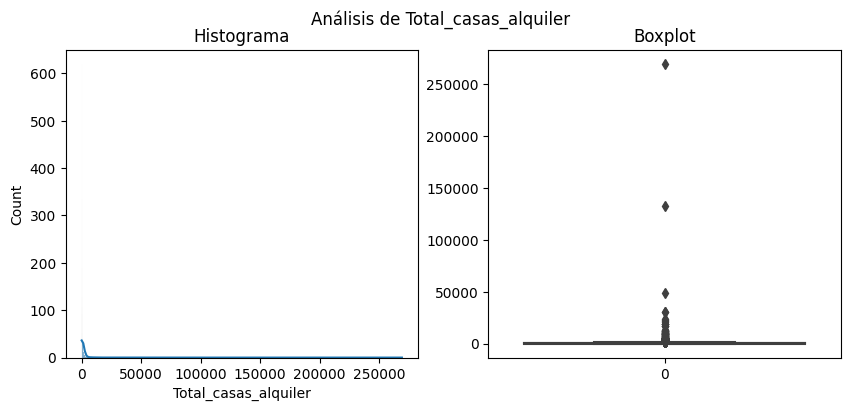

La columna Total_casas_alquiler no presenta una distribución normal



Análisis univariante de Porcentaje_viviendas_alquiler:


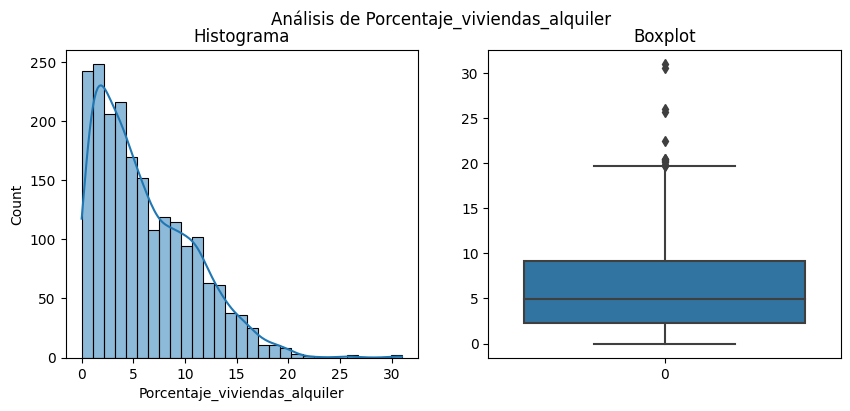

La columna Porcentaje_viviendas_alquiler no presenta una distribución normal



Análisis univariante de Porcentaje_vc_alquiler:


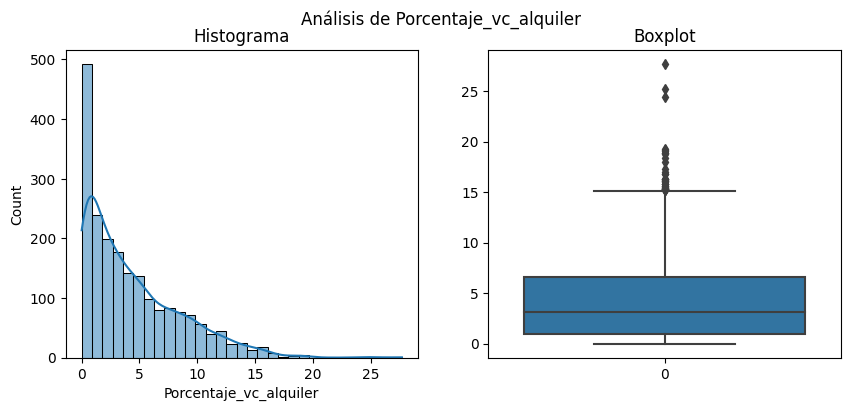

La columna Porcentaje_vc_alquiler no presenta una distribución normal



Análisis univariante de Porcentaje_vu_alquiler:


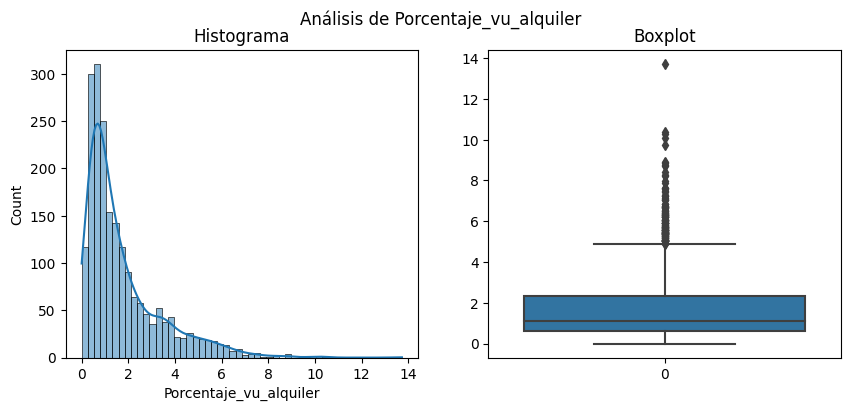

La columna Porcentaje_vu_alquiler no presenta una distribución normal



Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 13


,Mean,Median,Mode,Variance,Standart_desv,Percentil_25,Percentil_75,K_test,p_value,Distribution
Features,,,,,,,,,,
Total_vc,888.735253,108.000000,0.000000,4.834487e+07,6953.047247,24.000000,412.000000,0.935197,0.0,Not standart
Total_vu,111.439752,52.000000,15.000000,3.700761e+04,192.373629,21.000000,126.000000,0.989796,0.0,Not standart
Alquiler_mes_vc_m2,4.761812,4.324324,4.939062,3.078430e+00,1.754545,3.428956,5.714286,0.978528,0.0,Not standart
Alquiler_mes_vu_m2,3.835967,3.454601,2.527683,2.407593e+00,1.551642,2.703437,4.602713,0.939759,0.0,Not standart
Poblacion,19960.828578,6152.000000,2135.000000,8.417442e+09,91746.620857,3267.000000,15017.000000,1.000000,0.0,Not standart
Inmuebles_totales,10565.331038,3522.000000,1873.000000,2.036231e+09,45124.614835,2005.000000,8016.000000,1.000000,0.0,Not standart
Viviendas_turisticas,264.968519,22.000000,0.000000,1.445644e+06,1202.349368,6.000000,99.000000,0.878873,0.0,Not standart
Turistas,61143.727496,8619.000000,30.000000,1.022775e+11,319808.513973,2741.000000,27044.000000,1.000000,0.0,Not standart
Porcentaje_viviendas_turisticas,2.210585,0.533511,0.000000,2.289986e+01,4.785380,0.168103,1.789264,0.500000,0.0,Not standart


In [11]:
# Se reraliza el análisis univariante del dataframe

fn.get_univariate_analysis(df_2021)

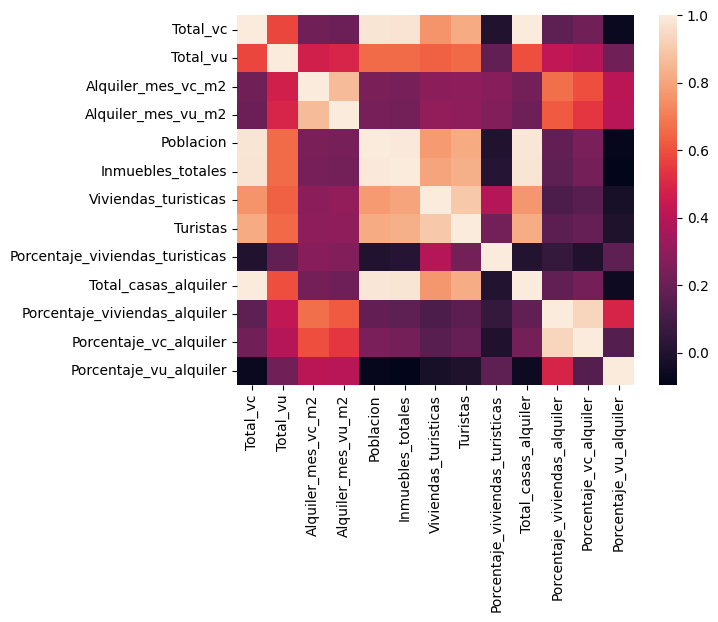

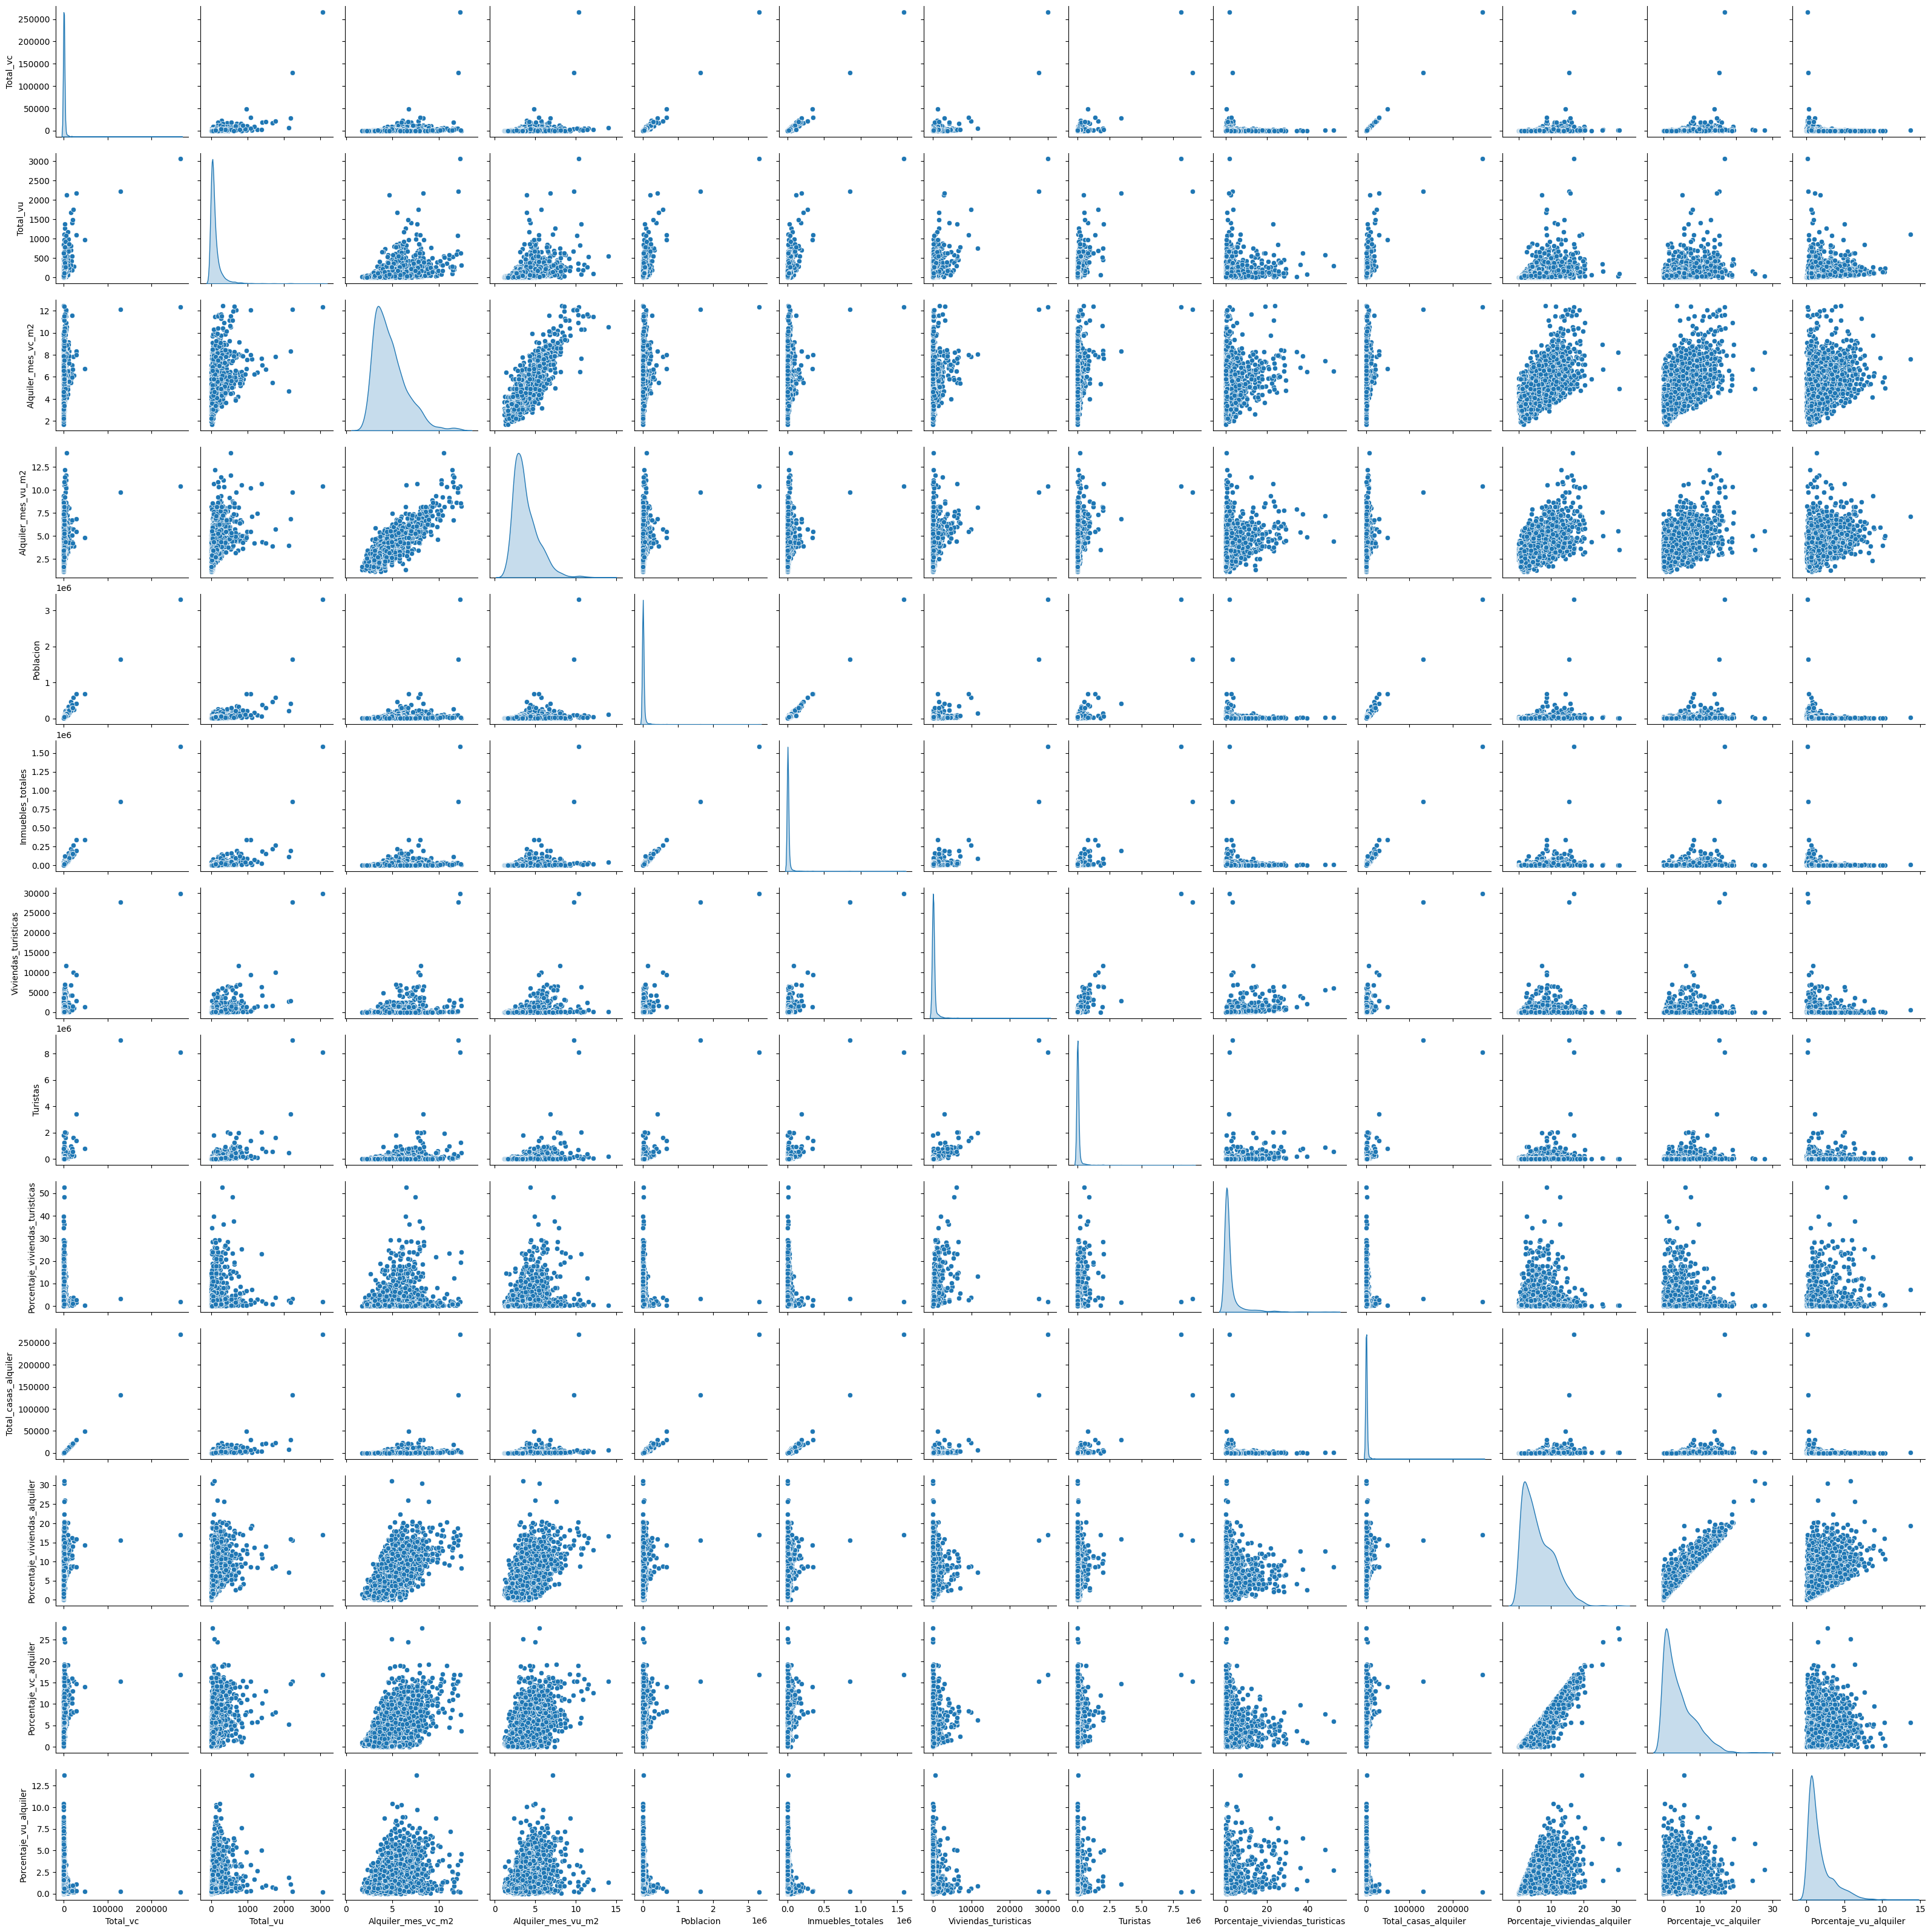

In [12]:
# Se realiza el análisis bivariante de dataframe

fn.get_bivariate_analysis(df_2021)

## 4.3. Preparación de datos<a id='43'></a>  
  
Tras realizar el EDA, observamos que todavía quedan columnas que no son numéricas, se procede a cambiarlas a numéricas. Para ello utilizaremos una máquina de transformación llamada Ordinal Encoder. Esta máquina es mejor que la máquina llamada Label Encoder, ya que es más eficiente y cambia las categorias con cierto orden.

In [13]:
# Cammbiamos las categorías de la columnas Comunidad_autonoma a numéricas
le = OrdinalEncoder()
df_2021[["Comunidad_autonoma"]] = le.fit_transform(df_2021[["Comunidad_autonoma"]])

# COmprobamos si se han cambiando bien y los valores únicos que obtenemos
df_2021["Comunidad_autonoma"].unique()

array([12., 15.,  8.,  0.,  4.,  6., 10., 13.,  1.,  3.,  7., 16., 11.,
        5.,  2.,  9., 14.])

# 4.4. Limpieza y preparación de otros dataframes <a id='44'></a>  
  
Se realiza la misma limpieza utilizada para los datos correspondientes a 2021, a los datos de 2020. Esto se realiza porque es necesario para mostrar el R2 que aporta la aplicación en la página principal de la aplicación web.

In [14]:
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2021")]

# Se eliminan las variables con 2020 al final
df_2020 = df_init.drop(col_to_drop, axis=1)

# Se observa si el dataframe ha quedado como se desea
df_2020.head()

,Codigo_provincia,Provincia,Codigo_municipio,Total_vc_2020,Total_vu_2020,Alquiler_mes_vc_m2_2020,Alquiler_mes_vu_m2_2020,Comunidad_autonoma,Poblacion_2020,Inmuebles_totales,Viviendas_turisticas_2020,Turistas_2020,Porcentaje_viviendas_turisticas_2020,Total_casas_alquiler_2020,Porcentaje_viviendas_alquiler_2020,Porcentaje_vc_alquiler_2020,Porcentaje_vu_alquiler_2020
Abadín,27,Lugo,27001,204.615385,11.0,2.793878,1.346634,Galicia,2322.0,1662.0,5,3050,0.300842,215.615385,12.973248,12.311395,0.661853
Abanilla,30,Murcia,30001,15.000000,22.0,3.036911,1.546392,"Murcia, Región de",6097.0,4483.0,18,15516,0.401517,37.000000,0.825340,0.334597,0.490743
Abarán,30,Murcia,30002,188.000000,54.0,2.961165,2.727273,"Murcia, Región de",13022.0,6615.0,1,11442,0.015117,242.000000,3.658352,2.842026,0.816327
Abegondo,15,"Coruña, A",15001,7.000000,60.0,3.585766,3.200000,Galicia,5398.0,3127.0,8,1611,0.255836,67.000000,2.142629,0.223857,1.918772
Abrera,8,Barcelona,8001,374.000000,153.0,6.782946,6.734083,Cataluña,12538.0,5344.0,13,41960,0.243263,527.000000,9.861527,6.998503,2.863024


Se toma el dataset de 2020 y se elimina la variable **Alquiler_mes_vu_m2_2020** para que sirva como csv de prueba para la presentación de la aplicación web.

In [15]:
# Se elimina la columna Alquiler_mes_vu_m2_2020
df_2020_probe = df_2020.drop("Alquiler_mes_vu_m2_2020", axis=1)

# Se observa si el dataframe ha quedado como se desea
df_2020.head()

,Codigo_provincia,Provincia,Codigo_municipio,Total_vc_2020,Total_vu_2020,Alquiler_mes_vc_m2_2020,Alquiler_mes_vu_m2_2020,Comunidad_autonoma,Poblacion_2020,Inmuebles_totales,Viviendas_turisticas_2020,Turistas_2020,Porcentaje_viviendas_turisticas_2020,Total_casas_alquiler_2020,Porcentaje_viviendas_alquiler_2020,Porcentaje_vc_alquiler_2020,Porcentaje_vu_alquiler_2020
Abadín,27,Lugo,27001,204.615385,11.0,2.793878,1.346634,Galicia,2322.0,1662.0,5,3050,0.300842,215.615385,12.973248,12.311395,0.661853
Abanilla,30,Murcia,30001,15.000000,22.0,3.036911,1.546392,"Murcia, Región de",6097.0,4483.0,18,15516,0.401517,37.000000,0.825340,0.334597,0.490743
Abarán,30,Murcia,30002,188.000000,54.0,2.961165,2.727273,"Murcia, Región de",13022.0,6615.0,1,11442,0.015117,242.000000,3.658352,2.842026,0.816327
Abegondo,15,"Coruña, A",15001,7.000000,60.0,3.585766,3.200000,Galicia,5398.0,3127.0,8,1611,0.255836,67.000000,2.142629,0.223857,1.918772
Abrera,8,Barcelona,8001,374.000000,153.0,6.782946,6.734083,Cataluña,12538.0,5344.0,13,41960,0.243263,527.000000,9.861527,6.998503,2.863024


## 4.5. Exportación de datos<a id='45'></a>  
  
Se exportan todos los datasets preparados a diferentes csv. Los dataset necesarios para la aplicación web se exportaran a la carpeta app y el dataset con los datos limpios y transformados a la carpeta data de src. Los datos de estos csv irán separados por **;**.

In [16]:
# Se exporta el dataframe df_current_year
df_current_year.to_csv("data/processed/current_year_data.csv", sep=";", index=True)

# Se exporta el dataframe df_2020
df_2020.to_csv("app/data/last_year_data.csv", sep=";", index=True)

# Se exporta el dataframe df_2020_probe
df_2020_probe.to_csv("data/processed/last_year_data_probe.csv", sep=";", index=True)

# Se exporta el dataframe df_2021
df_2021.to_csv("data/processed/data_2021_processed.csv", sep=";", index=True)

# 5. Baselines<a id='5'></a>  
  
Se realiza el baseline para obtener el mejor modelo de regresión lineal posible.  
  
Lo primero que se raliza es la **división** del dataframe en **train** y **test**. Usamos el **20%** del dataframe como test.


In [17]:
# Se divide el dataframe en train y test de forma aleatoria
X_train, X_test, Y_train, Y_test = train_test_split(df_2021.drop(["Alquiler_mes_vu_m2"], axis=1), df_2021["Alquiler_mes_vu_m2"], test_size=0.2, random_state=42)

# Comprobamos las dimensiones de estos dataframes obtenidos para ver si la división se ha realizado correctamente
print(f"Dimensiones X_train: {X_train.shape}")
print(f"Dimensiones Y_train: {Y_train.shape}")
print(f"Dimensiones X_test: {X_test.shape}")
print(f"Dimensiones Y: {Y_test.shape}")


Dimensiones X_train: (1626, 13)
Dimensiones Y_train: (1626,)
Dimensiones X_test: (407, 13)
Dimensiones Y: (407,)


Seguidamente, se pasa el dataframe **X_train** e **Y_train** por un modelo **Random Forest Regressor** para, a partir del método **feature_importances_** obtener las features que tienen más peso en los modelos de predicción del target. A partir de estos datos, se creará un dataframe que será exportado a la carpeta app/data, ya que servirá para realizar la predicción en la aplicación web.

In [18]:
# Se crea el modelo y se entrena
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, Y_train)

# Se obtiene un dataframe con las columnas y su importancia en el modelo de predicción ordenadas por importancia
df_features = pd.DataFrame({'features':X_train.columns, 'importances':random_forest.feature_importances_}).sort_values('importances', ascending=False).set_index("features")

# Se exporta el dataframe a un archivo csv separado por ;
df_features.to_csv("app/data/df_features.csv", sep=";", index=True)

# Se visualiza el dataframe
df_features

,importances
features,
Alquiler_mes_vc_m2,0.786805
Total_vu,0.039522
Turistas,0.019081
Porcentaje_vu_alquiler,0.018540
Porcentaje_vc_alquiler,0.018345
Comunidad_autonoma,0.017966
Porcentaje_viviendas_alquiler,0.017622
Total_casas_alquiler,0.016851
Porcentaje_viviendas_turisticas,0.015790


Se elimina las columnas de los dataframes X_train, X_test y df_2021 cuyo nombre corresponden a la séptima columna en adelante del dataframe obtenido del feature importance realizado anteriormente. Se eliminan estas columnas porque con las columnas que no se eliminan se explica el 90% del modelo.

In [19]:
# Se elimina las columnas que no aportan tanta explicación al modelo de predicción
X_train.drop(df_features[6:].index, axis=1, inplace=True)
X_test.drop(df_features[6:].index, axis=1, inplace=True)
df_2021.drop(df_features[6:].index, axis=1, inplace=True)

# Comprobamos las dimensiones de estos dataframes obtenidos para ver si la división se ha realizado correctamente
print(f"Número de columnas de X_train: {X_train.shape}")
print(f"Número de columnas de X_test: {X_test.shape}")
print(f"Número de columnas del Dataframe Principal: {df_2021.shape}")


Número de columnas de X_train: (1626, 6)
Número de columnas de X_test: (407, 6)
Número de columnas del Dataframe Principal: (2033, 7)


Se realiza un **análisis bivariante** del dataframe de **2021** al cual se les ha eliminado las columnas que no aportaban tanto peso al modelo de predicción. Esto se realiza para ver si existe mucha **colinealidad** y mucha **relación** entre las diferentes **features** que quedan y el **target**.

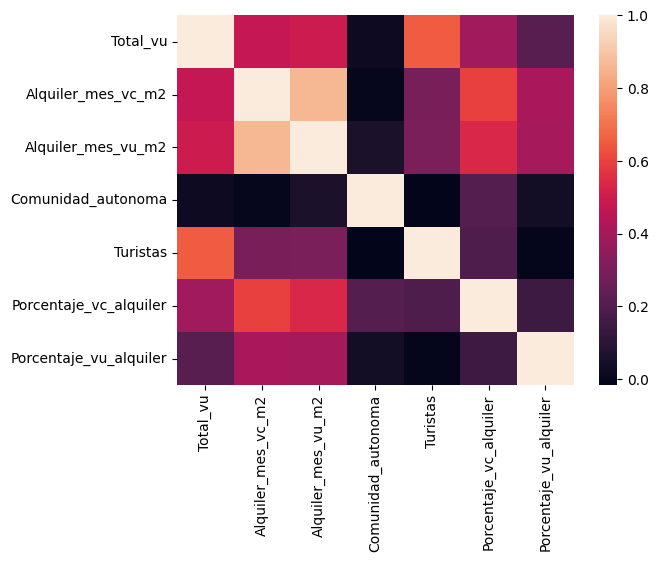

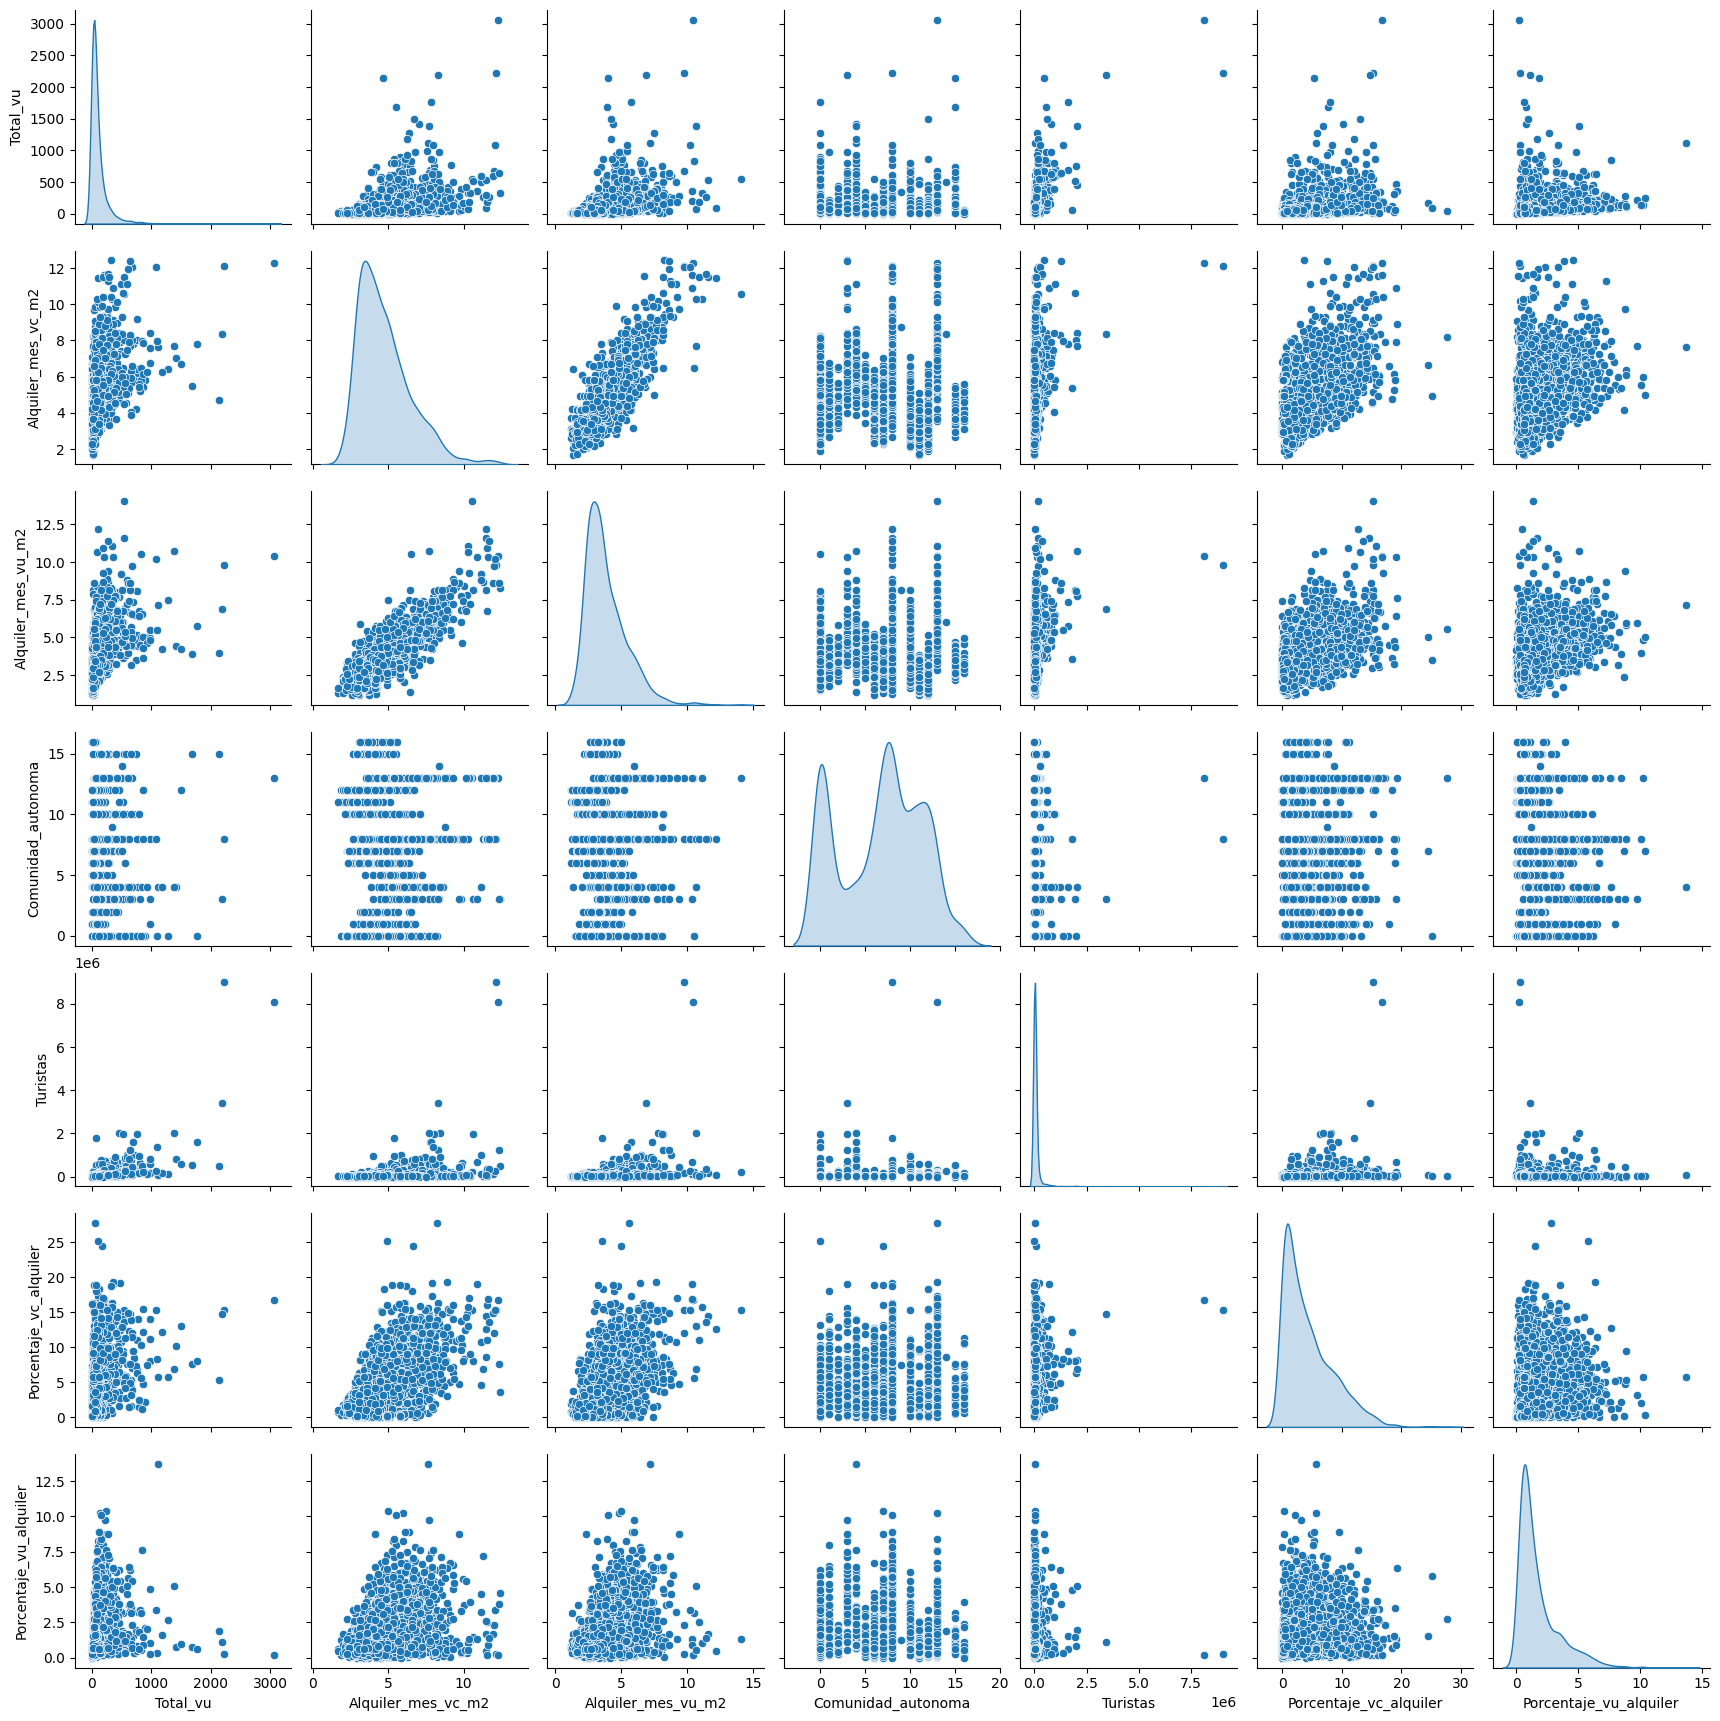

In [20]:
# Se realiza un análisis bivariante de dataframe df_2021 con las columnas ya eliminadas
fn.get_bivariate_analysis(df_2021)

Tras obtener el dataframe ya completamente listo, se realiza un **baseline** para obtener el mejor modelo que funciona con nuestro dataframe. Nos fijaremos en la métrica **R2**, ya que lo que queremos ver es como de bien se ajusta la predicción del modelo a la realidad. Después de realizar el baseline, se realiza un **GridSearch** del modelo que obtenga un R2 más alto.  
  
Una vez obtenido este modelo, se pasa los **test** al baseline realizado anteriormente para ver las métricas. Al modelo que ha obtenido un mayor R2 al predecir el test, se le aplica un **GridSearch**.  
  
Este proceso se realiza utilizando una función propia, la cual devuelve, primero el mejor modelo obtenido con el baseline optimizado por GridSearch y segundo el mejor modelo obtenido al predecir el test optimizado por GridSearch.

In [21]:
# Se obtiene el mejor modelo segun un baseline y el mejor modelo segun su predicción con el test, ambos optimizados por GridSearch
model, best_model = fn.get_best_model(X_train, Y_train, X_test, Y_test, 5, "R2", kmeans=False)

Baseline


,MAE,MAPE,MSE,RMSE,R2
GradientBoosting,0.499922,0.139854,0.486285,0.698641,0.794454
Random Forest,0.499463,0.139947,0.482220,0.695730,0.793773
XGBoost,0.511888,0.143560,0.505421,0.710929,0.785804
AdaBoost,0.624893,0.189074,0.666296,0.813926,0.710085
Polynomial Regression,0.552754,0.153775,0.792793,0.890389,0.673818
ElasticNet,0.653629,0.184968,0.808503,0.899168,0.662752
KNeighborsRegressor,0.980563,0.266881,1.835391,1.354766,0.223221
SuperVectorMachine,0.985343,0.260065,1.900169,1.378466,0.198879


The best methods based on R2 is GradientBoosting



Using the GradientBoosting model, the best params to aply are these {'GradientBoostingRegressor__learning_rate': 0.1, 'GradientBoostingRegressor__max_depth': 6, 'GradientBoostingRegressor__n_estimators': 91}. 
It has been obteing a R2 of 0.8042113120704807




Baseline test


,MAE,MAPE,MSE,RMSE,R2
GradientBoosting,0.499187,0.145006,0.486691,0.697632,0.803397
Random Forest,0.491689,0.143053,0.504410,0.710218,0.796239
XGBoost,0.515945,0.151270,0.506681,0.711815,0.795322
Polynomial Regression,0.535788,0.157576,0.540793,0.735386,0.781542
AdaBoost,0.643883,0.203595,0.719489,0.848227,0.709356
ElasticNet,0.684855,0.199600,0.876087,0.935995,0.646097
KNeighborsRegressor,1.019641,0.280195,1.923412,1.386871,0.223021
SuperVectorMachine,1.038009,0.283798,2.009979,1.417737,0.188052


The best methods based on R2 and after having done a test is GradientBoosting



Using the GradientBoosting model, the best params to aply are these {'GradientBoostingRegressor__learning_rate': 0.1, 'GradientBoostingRegressor__max_depth': 5, 'GradientBoostingRegressor__n_estimators': 81}. 
It has been obteing a R2 of 0.8043350740136381


Se **repite el proceso anterior** pero aplicando una **clusterización** mediante kmeans antes de aplicar el modelo. El número de clusters se determina mediante la inercia y la silhouette score, en este caso se utiliza una **clusterización de 3**.

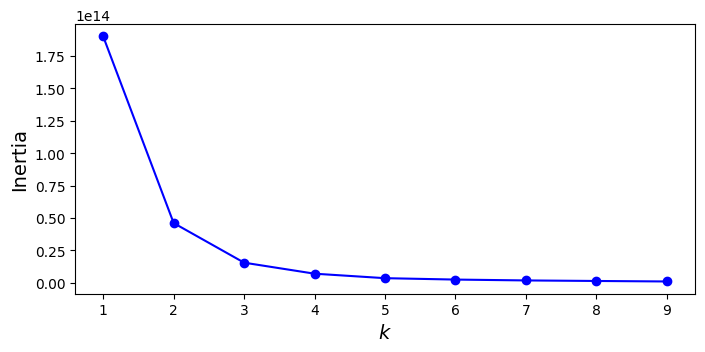

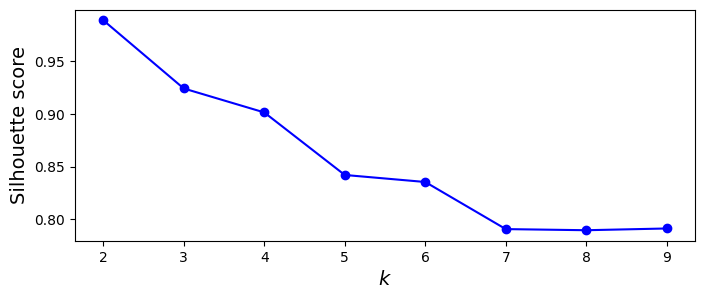

Baseline


,MAE,MAPE,MSE,RMSE,R2
Polynomial Regression,0.681157,0.185460,1.077759,0.981164,0.603800
GradientBoosting,1.009693,0.284756,1.817425,1.348600,0.230430
KNeighborsRegressor,1.072195,0.301352,2.069148,1.438453,0.123377
SuperVectorMachine,1.052987,0.278758,2.143966,1.464229,0.098939
AdaBoost,1.184330,0.358975,2.092919,1.462084,0.091872
XGBoost,1.096333,0.304564,2.174546,1.475684,0.075822
Random Forest,1.147434,0.319962,2.353828,1.532027,0.010808
ElasticNet,1.027612,0.288889,2.757341,1.660537,-0.189504


The best methods based on R2 is Polynomial Regression



Using the Polynomial Regression model, the best params to aply are these {'KMeans__n_clusters': 2, 'PolynomialFeatures__degree': 2, 'lr__fit_intercept': False}. 
It has been obteing a R2 of 0.6542883565310066




Baseline test


,MAE,MAPE,MSE,RMSE,R2
Polynomial Regression,0.675926,0.190947,0.857087,0.925790,0.653772
ElasticNet,1.083675,0.320071,1.957622,1.399151,0.209202
GradientBoosting,1.066707,0.307836,1.964100,1.401463,0.206585
AdaBoost,1.197508,0.380485,2.144002,1.464241,0.133912
KNeighborsRegressor,1.113826,0.317524,2.175757,1.475045,0.121085
SuperVectorMachine,1.113953,0.306915,2.267803,1.505923,0.083902
XGBoost,1.141628,0.322463,2.329618,1.526309,0.058931
Random Forest,1.205980,0.340859,2.619124,1.618371,-0.058017


The best methods based on R2 and after having done a test is Polynomial Regression



Using the Polynomial Regression model, the best params to aply are these {'KMeans__n_clusters': 2, 'PolynomialFeatures__degree': 2, 'lr__fit_intercept': True}. 
It has been obteing a R2 of 0.6543077983675664


In [22]:
# Se obtiene el mejor modelo con clusterización previa según un baseline y el mejor modelo con clasterización previa según su predicción con el test, ambos optimizados por GridSearch
mode_kmeans, best_model_kmeans = fn.get_best_model(X_train, Y_train, X_test, Y_test, 5, "R2", kmeans=True)

Tras obtener los supuestos mejores modelos observamos que la **clusterización empeora** la métrica R2, es por ello por lo que la **descartamos**.  
  
Para asegurarnos que el mejor modelo es el que nos ha dado el baseline, realizamos una **optimización de hiperparámetros** del **segundo** y del **tercer** modelo que obtenemos en el baseline con mejor R2.

In [ ]:
# Random Forest pipeline
rdf_pipe = Pipeline([
    ('RandomForestRegressor', RandomForestRegressor()),
])

# Parámetros a probar con el GridSearch
param_grid = {
    "RandomForestRegressor__n_estimators": range(1, 100, 10),
    "RandomForestRegressor__max_depth": range(3, 10),
    "RandomForestRegressor__min_samples_leaf": range(1, 20),
    "RandomForestRegressor__max_leaf_nodes": range(1, 20)
}

# Instancia del GridSearch
grid_search = GridSearchCV(estimator=rdf_pipe,
                           param_grid=param_grid,
                           cv=5,
                           scoring="r2")

# Entrenamiento del GridSearch
grid_search.fit(X_train, Y_train)

print(
    f"Using the Random Forest model, the best params to aply are these {grid_search.best_params_}. ")
print(f"It has been obteing a R2 of {abs(grid_search.best_score_)}")

In [26]:
# XGBoost pipeline
xgb_pipe = Pipeline([
    ('XGBRegressor', xgb.XGBRegressor()),
])

# Parametros a probar con el GridSearch
param_grid = {
    "XGBRegressor__n_estimators": range(1, 100, 10),
    "XGBRegressor__max_depth": range(3, 10),
    "XGBRegressor__alpha": [0, 0.01, 0.1],
    "XGBRegressor__lambda": [0, 0.01, 0.1]
}

# Instancia del GridSearch
grid_search = GridSearchCV(estimator=xgb_pipe,
                           param_grid=param_grid,
                           cv=5,
                           scoring="r2")

# Entrenamiento del GridSearch
grid_search.fit(X_train, Y_train)

print(
    f"Using the Random Forest model, the best params to aply are these {grid_search.best_params_}. ")
print(f"It has been obteing a R2 of {abs(grid_search.best_score_)}")

Using the Random Forest model, the best params to aply are these {'XGBRegressor__alpha': 0.01, 'XGBRegressor__lambda': 0.1, 'XGBRegressor__max_depth': 5, 'XGBRegressor__n_estimators': 21}. 
It has been obteing a R2 of 0.7999785387075897


En ambos modelos, tras optimizar los hiperparámetros, obtenemos **R2** más **baja** que el primer modelo obtenido tras optimizar el mejor modelo del baseline, por lo que **usaremos** ese **primer modelo**, el cual es el **Gradient Boosting Regressor**, con los hiperparámetros optimizados. Los hiperparámetros usados son los siguientes:  
  
* **learning_rate**=0.1  
  
* **max_depth**=6  
  
* **n_estimators**=71  
  
Tras entrenar este modelo, lo **exportamos** a la carpeta models.
  
Para todo este proceso, utilizamos una **función propia**.

In [25]:
# Se crea una lista con las columnas cuyo nombre termina en "2020"
col_to_drop = [col for col in df_init.columns if col.endswith("2020")]

# Se eliminan las variables con 2020 al final
df_2021 = df_init.drop(col_to_drop, axis=1)
df_2021.columns = [re.sub(r"_20\d{2}$", '', col) for col in df_2021.columns]

#Se eliminan las columnas innecesarias y aquellas que aportan menos de un 90% de peso al modelo de predicción
df_2021.drop(["Provincia", "Codigo_municipio","Codigo_provincia"],axis=1, inplace=True)
df_2021.drop(df_features[6:].index, axis=1, inplace=True)

#Se exporta el modelo final entrenado a la carpeta models, en este caso el modelo es un Gradient Boosting Regressor
final_model = fn.get_final_model(df_2021, "Comunidad_autonoma", "Alquiler_mes_vu_m2", "./models/my_model.pkl")

Se ha exportado el modelo final a la ruta: ./models/my_model.pkl
